# 3. Unsupervised Learning

## Clustering
Finding groups of data (clusters) so that the samples within a cluster are more similar to each other than to the samples in other clusters

### Example: Clustering Sound Data with k-means
#### k-means:
* Partition data into $k$ clusters
* Iteratively move cluster _centroids_ to the mean of the samples that are closest to it
* Minimizes variances of the clusters

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial.distance import euclidean as euclidean_distance
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')

In [2]:
features = ['zero_crossing_rate', 'spectral_centroid']

df = pd.read_csv('../data/cats_and_dogs.csv', index_col=0)
df[features] = minmax_scale(df[features].values)

@interact(n_iters=widgets.BoundedIntText(min=0, max=5))
def k_means(n_iters):    
    def update_clusters():
        return df[features].apply(
            lambda x: np.argmin(
                [euclidean_distance(x, centroids[i, :]) for i in (0, 1)]
            ),
            axis=1
        )
    
    def update_centroids():
        return df.groupby('cluster')[features].mean().values

    for i in range(n_iters + 1):
        if i == 0:
            centroids = np.array([[0, 0], [0.6, 0.6]])
        else:
            centroids = update_centroids()
        df.loc[:, 'cluster'] = update_clusters()

    style = dict(s=300, c=[0, 1], marker='X', linewidth=1, edgecolor='k', cmap='winter')
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim([0, 1.0])
    ax.set_ylim([0, 1.0])
    df.plot.scatter(*features, c='cluster', cmap=style['cmap'], ax=ax)
    ax.scatter(centroids[:, 0], centroids[:, 1], **style)

interactive(children=(BoundedIntText(value=0, description='n_iters', max=5), Output()), _dom_classes=('widget-…

## Anomaly detection
Identifying samples that differ from the majority of samples

### Example: Anomaly Detection For Sound Data
#### Local Outlier Factor
* Identify outliers (anomalies) by comparing their distance to $k$ nearest neighbours to the corresponding distances of those neighbours

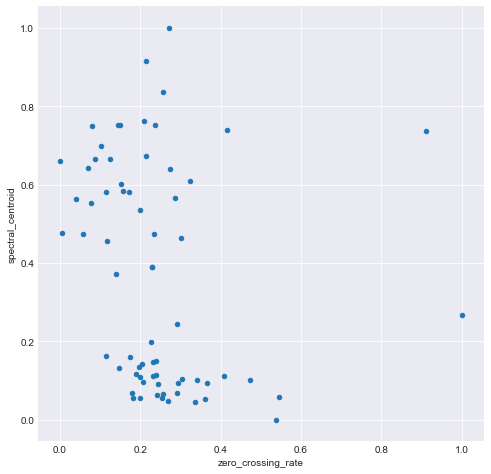

In [4]:
df = pd.concat([
    pd.read_csv('../data/cats_and_dogs.csv', index_col=0),
    pd.read_csv('../data/anomalies.csv', index_col=0)
])

df[features] = minmax_scale(df[features].values)
df.plot.scatter(*features, figsize=(8, 8));

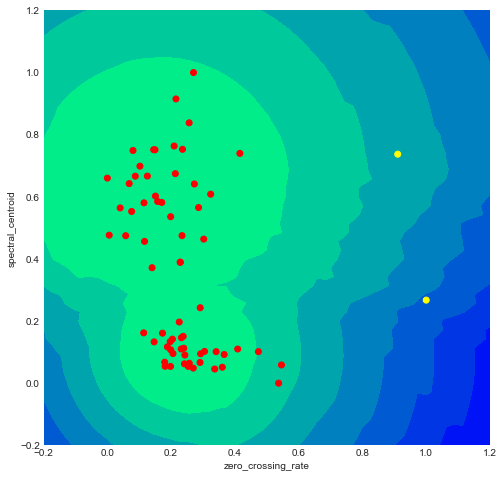

In [32]:
model = LocalOutlierFactor(n_neighbors=20, contamination=0.025)
df.loc[:, 'is_outlier'] = (model.fit_predict(df[features]) - 1).astype(bool)

limits = [-0.2, 1.2]
xx, yy = np.meshgrid(np.linspace(*limits, 50), np.linspace(*limits, 50))
Z = model._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(xx, yy, Z, cmap='winter')
ax.scatter(df[features[0]], df[features[1]], c=df.is_outlier, cmap='autumn')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1]);

In [39]:
df[df.is_outlier]

,filename,animal,spectral_centroid,zero_crossing_rate,is_outlier
name,,,,,
bark,../data/anomalies/bark.wav,cat,0.267379,1.000000,True
meow,../data/anomalies/meow.wav,cat,0.737163,0.910677,True


In [37]:
import IPython.display as ipd
ipd.Audio(df[df.is_outlier].iloc[0].filename)

In [38]:
ipd.Audio(df[df.is_outlier].iloc[1].filename)